## Generating Random Variables and Vectors

* *numpy.random.uniform* for generating $\mathcal{U}[a,b]$ random variables, and
* *numpy.random.normal* for generating gaussian $\mathcal{N}(\mu,\sigma^2)$ random variables.

In this script we want to show how to generate other kinds of random variables

In [2]:
# Import necessary packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### $\mathcal{U}[\boldsymbol{a},\boldsymbol{b}]$ random vectors
If we need uniform random vectors, $\boldsymbol{X}$, over an arbitrary, finite $d$-dimensional box $[\boldsymbol{a},\boldsymbol{b}]$, then we can make an affine transformation:

$$
 X_j = a_j + (b_j - a_j) U_j, \quad j=1, \ldots, d, \qquad \boldsymbol{U}
 \sim \mathcal{U}[0,1]^d.
$$

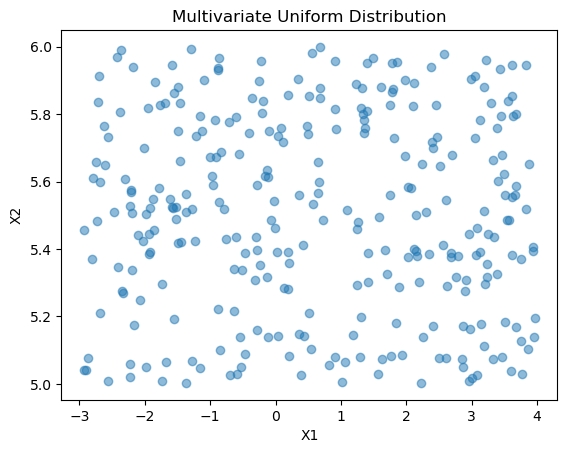

In [4]:
# Lower bounds
low = [-3, 5]
# Upper bounds
high = [4, 6]
# Number of samples
n_samples = 300
# Generate multivariate uniform random samples
samples = np.random.uniform(low, high, (n_samples, len(low)))
# Plot the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Multivariate Uniform Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### $\mathcal{N}(\boldsymbol{m},\mathsf{\Sigma})$ random vectors
If we need Gaussian random vectors with an arbitrary mean and covariance matrix, i.e.,
$\boldsymbol{X} \sim \mathcal{N}(\boldsymbol{m},\mathsf{\Sigma})$, then we can make an affine transformation.

If $\mathsf{A}$ is an arbitrary $d \times d$ matrix, $\boldsymbol{m}$ is an arbitrary $d$-vector, and $\boldsymbol{Z} \sim \mathcal{N}(\boldsymbol{0},\mathsf{I})$, then

$$ \boldsymbol{X} = \boldsymbol{m} +  \mathsf{A} \boldsymbol{Z} $$

is automatically Gaussian with mean 

$$ \mathbb{E}(\boldsymbol{X}) = \mathbb{E}(\boldsymbol{m}) +  \mathsf{A}  \mathbb{E}(\boldsymbol{Z}) = \boldsymbol{m} $$

and variance 

$$ \text{var}(\boldsymbol{X}) =
 \mathbb{E}\bigl[(\boldsymbol{X} - \boldsymbol{m})(\boldsymbol{X} -
 \boldsymbol{m})^T \bigr] = \mathbb{E}\bigl[\mathsf{A}
 \boldsymbol{Z}\boldsymbol{Z}^T \mathsf{A}^T \bigr] = \mathsf{A}
 \mathbb{E} \bigl[\boldsymbol{Z} \boldsymbol{Z}^T \bigr] \mathsf{A}^T = \mathsf{A}
 \mathsf{A}^T $$

 So if we can choose $\mathsf{A}$ such that $\mathsf{\Sigma} =  \mathsf{A} \mathsf{A}^T$, we have a way to generate Gaussian random
 vectors with arbitrary mean and covariance matrix.  One way to do that is using the Cholesky decomposition. Note that in our notation above our random vectors are column vectors, but in our notation below they are row vectors.

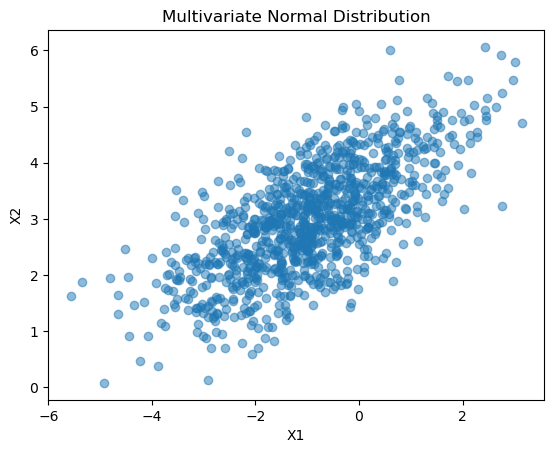

In [5]:
# Mean vector
m = [-1, 3]

# Covariance matrix; a symmetric positive-definite matrix
Sigma = [[2,1], [1,1]]

# Number of samples
n_samples = 1000

# Generate the samples
samples = np.random.multivariate_normal(m, Sigma, n_samples)

# Plot the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.title('Multivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

After we did the cholesky decomposition, we got matrix A is
  [[1.41421356 0.        ]
 [0.70710678 0.70710678]]


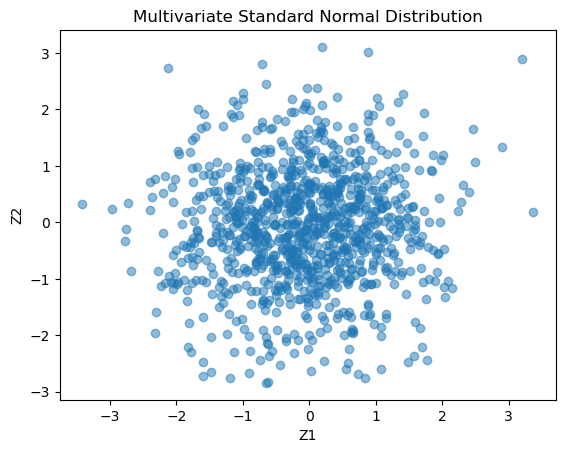

In [53]:
## Let's try to generate via the affine transformation
A = np.linalg.cholesky(Sigma)
print("After we did the cholesky decomposition, we got matrix A is\n ", A)

## Generate a standard normal random vector
Z = np.random.normal(size = (n_samples,2))
# Plot the samples
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5)
plt.title('Multivariate Standard Normal Distribution')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()


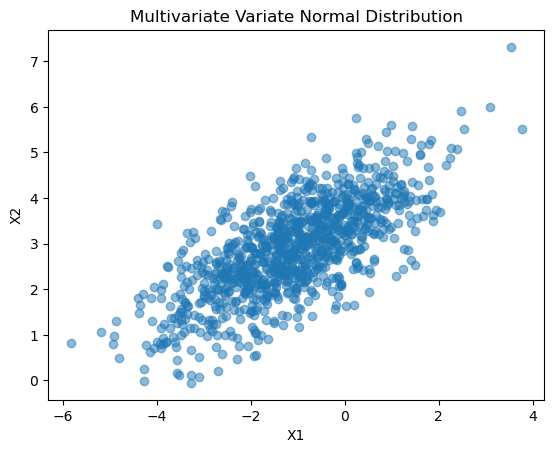

In [54]:
# Generate the multivariate normal random vectors
X = m + np.dot(Z,A.T)

# Plot the samples
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Multivariate Variate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

We may check that the sample quantities are close to the population quantities:

In [58]:
np.mean(X,axis = 0) # should be close to m

array([-1.10847324,  2.89324462])

In [59]:
np.cov(X.T) # should be close to Sigma

array([[2.00200605, 1.0559271 ],
       [1.0559271 , 1.07966493]])

Given a covariance matrix $\mathsf{\Sigma}$ there are many matrices $\mathsf{A}$ satisfying $\mathsf{\Sigma} = \mathsf{A}\mathsf{A}^T$

For example, if $\mathsf{U}$ is any unitary matrix, i.e., any matrix satisfying $\mathsf{U}^T \mathsf{U} = \mathsf{I}$, then
$\mathsf{\Sigma} = \mathsf{C} \mathsf{C}^T$ for $\mathsf{C} = \mathsf{A}\mathsf{U}^T$.  Another way to find a matrix $\mathsf{A}$ satisfying $\mathsf{\Sigma} = \mathsf{A} \mathsf{A}^T$ is to use the singular value decomposition: $\mathsf{\Sigma} = \mathsf{U}\mathsf{\Gamma}\mathsf{V}'$, where $\mathsf{U}$ and $\mathsf{V}$ are unitary and $\mathsf{\Gamma}$ is diagonal with non-negative entries.  Since $\mathsf{\Sigma}$ is symmetric, $\mathsf{U} = \mathsf{V}$, so one may choose

$$ \mathsf{A} = \mathsf{U} \mathsf{\Gamma}^{1/2}. $$

In [79]:
U,Gamma,VT = np.linalg.svd(Sigma) # computes the SVD decomposition 
B = np.dot(np.diag(np.sqrt(Gamma)),U.T) # to create an upper triangluar matrix such that B'B = Sigma
# note that this B corresponds to our A' above
np.dot(B.T,B) #checking that this is Sigma

array([[2., 1.],
       [1., 1.]])

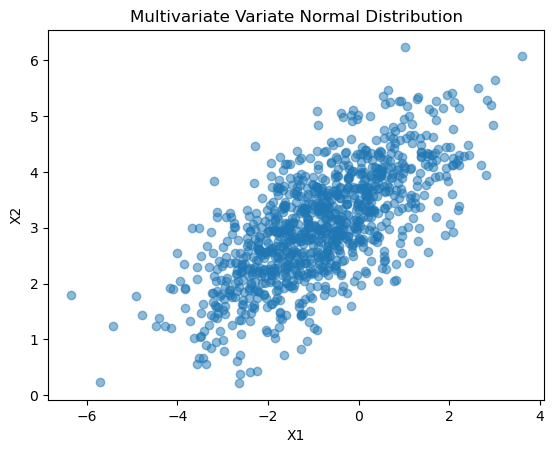

In [80]:
# Generate the multivariate normal random vectors
Xnew = m + np.dot(Z,B)

# Plot the samples
plt.scatter(Xnew[:, 0], Xnew[:, 1], alpha=0.5)
plt.title('Multivariate Variate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Again we may check that the sample quantities are close to the population quantities:

In [81]:
np.mean(Xnew,axis = 0) # should be close to m

array([-0.87029585,  3.02619926])

In [82]:
np.cov(Xnew.T) # should be close to Sigma

array([[2.05614377, 0.96833042],
       [0.96833042, 0.96499938]])

### Generating Exp($\lambda$) Random Numbers by the Inverse Distribution Transformation

For random vectors that are not distributed uniformly or Gaussian, we may sometimes use the inverse cumulative distribution function.  To genearate an exponentially distributed random variable, $Y \sim$   Exp($\lambda$), one uses the transformation

$$ Y = \frac{-\log(X)}{\lambda}, \qquad X \sim [0,1]. $$

Suppose that the taxis arrive at a rate of once per ten minutes, $\lambda = 0.1 \min {}^{-1}$.  Then the average time required to wait for two taxis to take your group of eight friends is $20$ minutes, which can be computed analytically and by Monte Carlo:


In [93]:
twotaxiwait = lambda n: -10*np.sum(np.log(np.random.rand(n,2)),axis = 1)
avgwait = meanMC_CLT(twotaxiwait,0.01,0,0.01)
print("The average waiting time for two taxis is around ", f"{avgwait[0]:.2f}","minutes.")

The average waiting time for two taxis is around  20.00 minutes.


### Generating Discrete Random Numbers by the Inverse Distribution Transformation

Discrete random variables have their probablity mass functions, $\varrho$, and cumulative distribution functions, $F$, given by tables, e.g.,

 $$ \begin{array}{r|cccc} y & 0 & 1 & 2 & 3 \\
 \varrho(y) = \mathbb{P}(Y=y) & 0.2 & 0.4 & 0.3 & 0.1 \\
 F(y) = \mathbb{P}(Y \le y) & 0.2 & 0.6 & 0.9 & 1 \\
 \end{array}$$
 

In [95]:
yvals = range(4) # ordered possible values of the random variable Y
PDFvals = [0.2,0.4,0.3,0.1] # corresponding values of the PDF
CDFvals = np.cumsum(PDFvals) # corresponding values of the CDF

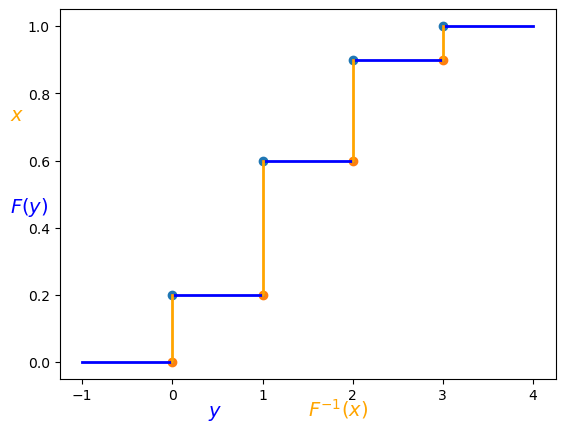

In [121]:
plt.scatter(yvals, CDFvals)
plt.scatter(yvals,np.insert(CDFvals[0:3],0,0))
plt.plot([np.insert(yvals,0,-1),np.append(yvals,4)],[np.insert(CDFvals,0,0),np.insert(CDFvals,0,0)], color='blue',linewidth=2)
plt.plot([yvals,yvals],[np.insert(CDFvals[0:3],0,0),CDFvals], color='orange',linewidth=2)
plt.text(0.3, -0.1, '$y$', fontsize=14, color='blue', transform=plt.gca().transAxes)
plt.text(0.5, -0.1, '$F^{-1}(x)$', fontsize=14, color='orange', transform=plt.gca().transAxes)
plt.text(-0.1, 0.45 ,'$F(y)$', fontsize=14, color='blue', transform=plt.gca().transAxes)
plt.text(-0.1, 0.7,'$x$', fontsize=14, color='orange', transform=plt.gca().transAxes)
plt.show()

This method is slower than *numpy.random.normal*, but is useful when the uniform random numbers come from non-IID uniform low discrepancy points.

In [111]:
[np.insert(yvals,0,-1),np.append(yvals,4)]

[array([-1,  0,  1,  2,  3]), array([0, 1, 2, 3, 4])]

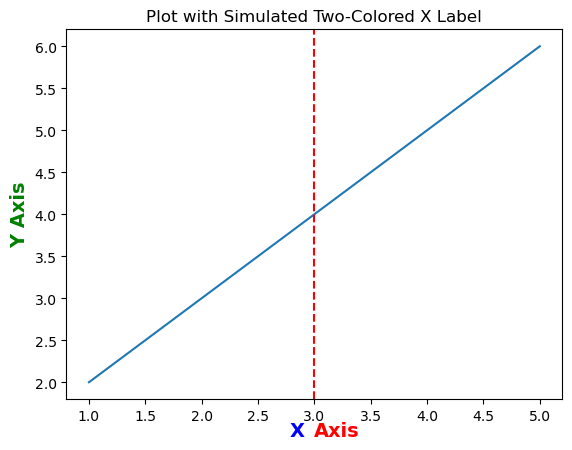

In [116]:
# Sample data for a line plot
x = [1, 2, 3, 4, 5]
y = [2, 3, 4, 5, 6]

# Create a line plot
plt.plot(x, y)

# Draw a vertical line at x = 3
plt.axvline(x=3, color='red', linestyle='--')

# Customize ylabel
plt.ylabel('Y Axis', fontsize=14, fontweight='bold', color='green')

# Add a title
plt.title('Plot with Simulated Two-Colored X Label')

# Add text annotations for xlabel
plt.text(0.45, -0.1, 'X', fontsize=14, fontweight='bold', color='blue', transform=plt.gca().transAxes)
plt.text(0.5, -0.1, 'Axis', fontsize=14, fontweight='bold', color='red', transform=plt.gca().transAxes)

# Show plot
plt.show()

#### meanMC_CLT function

In [83]:
def meanMC_CLT(inputRandomFuc,absTol,relTol,alpha): #Simple version of meanMC_CLT
    nsig = 1000 # initial size of the sample
    inflate = 1.2 # inflation rate
    YY = inputRandomFuc(nsig)
    sigma  = np.std(YY,ddof = 1)
    hum = np.mean(YY)
    sigmaUpBound = sigma * inflate #upper ound on the standard deviation
    nmu = max(1, np.power(np.ceil(stats.norm.ppf(1-alpha/2)*sigmaUpBound/max(absTol,relTol)),2).astype(int) )  # number of samples needed for the error tolerance
    mu = np.mean(inputRandomFuc(nmu))
    nSample = nsig + nmu
    return mu, nSample